In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


os.listdir("C:/Users/Lord Hera/OneDrive/Desktop/PyProject/Dataset")

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [35]:
Fichier = []
for i in os.listdir("C:/Users/Lord Hera/OneDrive/Desktop/PyProject/Dataset"):
    Fichier.append(i)
    
for i in Fichier:
    print(i)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [36]:
data = pd.DataFrame()

for i in Fichier:
    df_act = pd.read_csv('Dataset/'+i)
    data = pd.concat([data,df_act])
    
print(data.shape)

(186850, 6)


In [37]:
data.to_csv('data.csv', index = False) #convertir le fichier en un fichier csv

In [38]:
data.head() #afficher les 5 premiere valeur 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# suppression des valeurs NULL 

In [39]:
data.isnull().sum() #afficher les valeurs null (la somme)

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [40]:
 data = data.dropna() #supprimer les valeur null

In [41]:
data.shape 

(186305, 6)

# ANALYSE DE DONNEES SUR LE MEILLEUR MOIS DE VENTE DES PRODUITS

In [42]:
def mois (d):
    d = d.split('/')
    return d[0]
mois('03/18/07')

'03'

In [43]:
data["mois"] = data['Order Date'].apply(mois)

In [44]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,mois
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [45]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
mois                object
dtype: object

In [46]:
data['mois'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [47]:
data = data[data.mois!='Order Date']

In [48]:
data['mois'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [49]:
data["mois"]=data["mois"].astype(int)
data["Quantity Ordered"]=data["Quantity Ordered"].astype(int)
data["Price Each"]=data["Price Each"].astype(float)

In [50]:
data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
mois                  int32
dtype: object

In [51]:
data["vente"] = data["Quantity Ordered"] * data["Price Each"]

In [52]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,mois,vente
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [53]:
data1 = data.groupby("mois")['vente'].sum()
data1

mois
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: vente, dtype: float64

Text(0, 0.5, 'Vente')

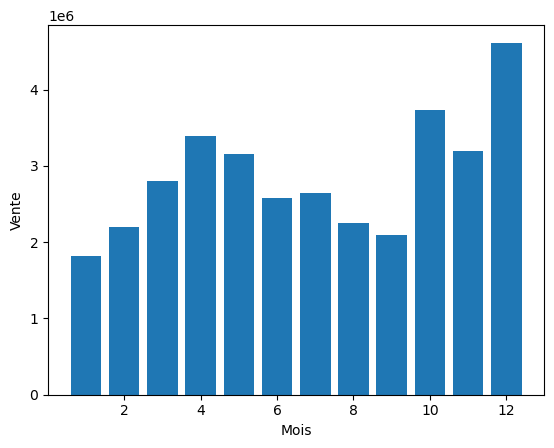

In [54]:
mois = range(1, 13)
plt.bar(mois, data1)
plt.xlabel('Mois')
plt.ylabel('Vente')

#le mois de decembre renvoie le le nombre le plus eleve en vente

# la ville avec le plus grand nombre de produit

In [55]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,mois,vente
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [56]:
def ville (v):
    v = v.split(',')
    return v[1]
ville('682spruse,los angeles,Ma002215')

'los angeles'

In [57]:
data["ville"] = data['Purchase Address'].apply(ville)

In [58]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,mois,vente,ville
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [59]:
data1 = data.groupby("ville")['ville'].count()
data1

ville
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: ville, dtype: int64

Text(0, 0.5, 'Nombre de commandes')

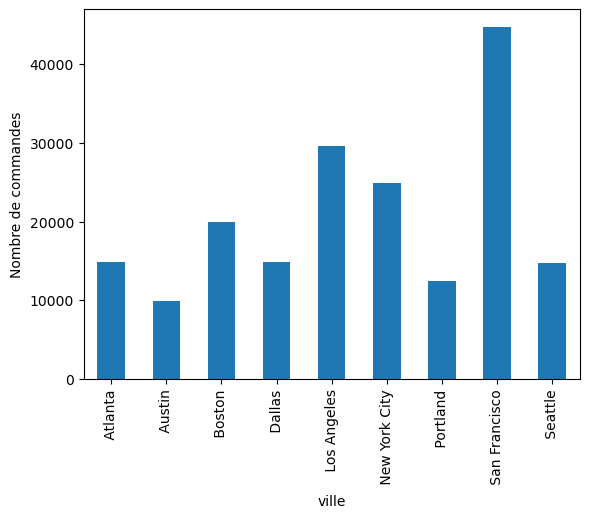

In [60]:
data1.plot.bar()
plt.ylabel('Nombre de commandes')


# heure de commande de la population

In [61]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,mois,vente,ville
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [62]:
data['heure'] = pd.to_datetime(data['Order Date']).dt.hour

In [63]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,mois,vente,ville,heure
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [64]:
heure = []
heure.sort()
for i in data["heure"]:
    heure.append(i)
    
heur = list(set(heure))
print(heur)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [65]:
compte = []
for i in range(24):
    x = heure.count(heur[i])
    compte.append(x)
print(compte)

[3910, 2350, 1243, 831, 854, 1321, 2482, 4011, 6256, 8748, 10944, 12411, 12587, 12129, 10984, 10175, 10384, 10899, 12280, 12905, 12228, 10921, 8822, 6275]


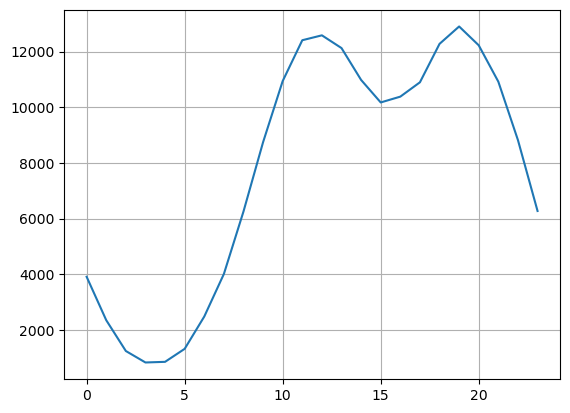

In [66]:
plt.grid()
plt.plot(heur, compte)